# PREDICTING CHURN IN TELECOM'S DATASET

* **AUTHOR** : PETER MAINA  
* **TMs**    : Anthony Muiko / Diana Mongina  
* **DATE**   : 27Th August 2024  
* **COHORT** : DSFT-09

![alt text](Images/Churn.jpg)



## **1. BUSINESS UNDERSTANDING**

#### **PROJECT OVERVIEW**

> * Churn occurs when customers are leaving a company's services in pursuit of better services from other network providers.  
> * This is caused by dissatisfaction of the company's services or competitors offering better prices.  
> * Churn causes loss of the revenue to the company and it makes it hard to retain customers.  
> * Identifying potential churners will help to retain customers and improve customer satisfaction.

**BUSINESS PROBLEM**

> 1. The business problem is to identify the customers who have a high likelihood of churning and to develop effective strategies to reduce or to retain churning customers.  
> 2. Identify factors that cause customer dissatisfaction and churn, such as network quality, customer service issues, or pricing concerns.   
> 3. To identify customer segments based on their behavior and likelihood of churn inorder to tailor marketing and retention strategies to each group's specific needs and preferences.

**PROJECT OBJECTIVE**

> 1. **Churn Prediction**: To build predictive machine learning models that can predict which customers are likely to churn by using data to analyze customer features.
> 2. **Model Performance Assessment**: Comparing the machine learning models and determine which is the most accurate model in prediction.
> 3. **Increase Revenue**: Retaining more customers would allow for more revenue and also an increase in market share.
> 4. **Feature Insights**: Examining individual features will help gain insights on the causes of customer churn within the telecommunication company

**DATA SOURCE**

> My project utilizes data obtained from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data), it is about customer churn in a telecommunication company.

**STAKEHOLDERS**

> Stakeholders are telecommunications companies.  
> These companies can use this dataset and models to predict which customers are likely to churn.

**METHODOLOGY**

* The project will use the CRISP-DM that is Cross-Industry Standard Process for Data Mining methodology, which has several stages:

   >> Business understanding  
   >> Data Understanding  
   >> Data preparation  
   >> Modeling  
   >> Evaluation  
   >> Deployment  

## **2. DATA UNDERSTANDING**

In [55]:
# import relevant libraries
import csv 
import pandas as pd 
import seaborn as sns

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modeling
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report 

# performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# loading the dataset
data = pd.read_csv("bigml_Telecom_dataset.csv")

In [57]:
# display the first rows of the dataframe
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [58]:
# display the shape of the dataframe
data.shape

(3333, 21)

In [59]:
column_no = len(data.columns)
row_no = len(data.index)
print(f"my data has {column_no} columns and {row_no} rows")

my data has 21 columns and 3333 rows


In [60]:
# summary information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [61]:
# summary statistics of the dataframe
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [62]:
# Datatypes of the columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [63]:
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

> Churn is divided as: True if the customer terminated their contract, otherwise False

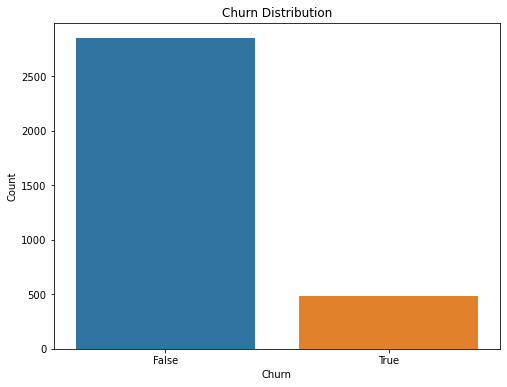

In [64]:
# countplot of the countplot features
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

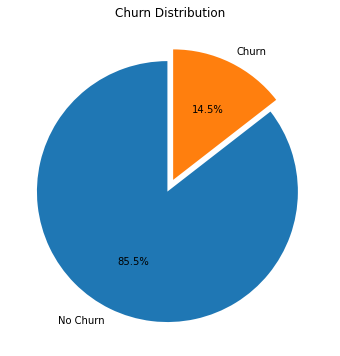

In [65]:
# Pie Chart the churn feature
data['churn'].value_counts().plot.pie(
    explode=[0.05, 0.05], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False, 
    figsize=(8, 6),
    labels=['No Churn', 'Churn'])
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()

> There are 3,333 customers in the dataset.Clients with contacts are 2850 while 483 have terminated their contract with the Telecom. That is 14.5% of customers lost.
> It seems there is a class imbalance but will sort it out later on. 

## **2. DATA PREPARATION**

**EXPLANATORY DATA ANALYSIS**

In [66]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

> There are no missing values in the data

In [67]:
# Checking for duplicates
data.duplicated().sum()

0

> There are no duplicates in the data

In [68]:
# Calculate unique values for each column
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [69]:
# Columns to drop 
columns_to_drop = ['account length', 'phone number', 'area code', 'state']
data.drop(columns=columns_to_drop, inplace=True)

> Focusing on columns_to_drop:
> 1. Account Length doesn't explain much about customer loyalty 
> 2. phone number doesn't explain much about the client's behaviours
> 3. Area code and State would limit our predictions only to a specific area preventing us from applying beyond the locale

In [70]:
data.dtypes

international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [92]:
# Splitting data into numberic and categorical features
#NUMERIC COLUMNS
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
print("NUMERIC COLUMNS ARE:")
print(numeric_columns.columns,)

print()

#CATEGORICAL COLUMNS
categorical_columns = data.select_dtypes(include=['object', 'bool'])
print("CATEGORICAL COLUMNS ARE:")
print(categoric_columns.columns)

NUMERIC COLUMNS ARE:
Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

CATEGORICAL COLUMNS ARE:
Index(['international plan', 'voice mail plan', 'churn'], dtype='object')


**CATEGORICAL FEATURE ANALYSIS**

**ANALYSIS ON THE 'Churn' FEATURE**
* Churn will be the dependent variable in my analysis
* Churn implies that: 
      * True, if a customer has terminated their contract
      * False, if a customer is loyal



**UNIVARIATE ANALYSIS**

> It allows us to focus on each variable and to check into each of their distributions.  
> This provides insights into individual features

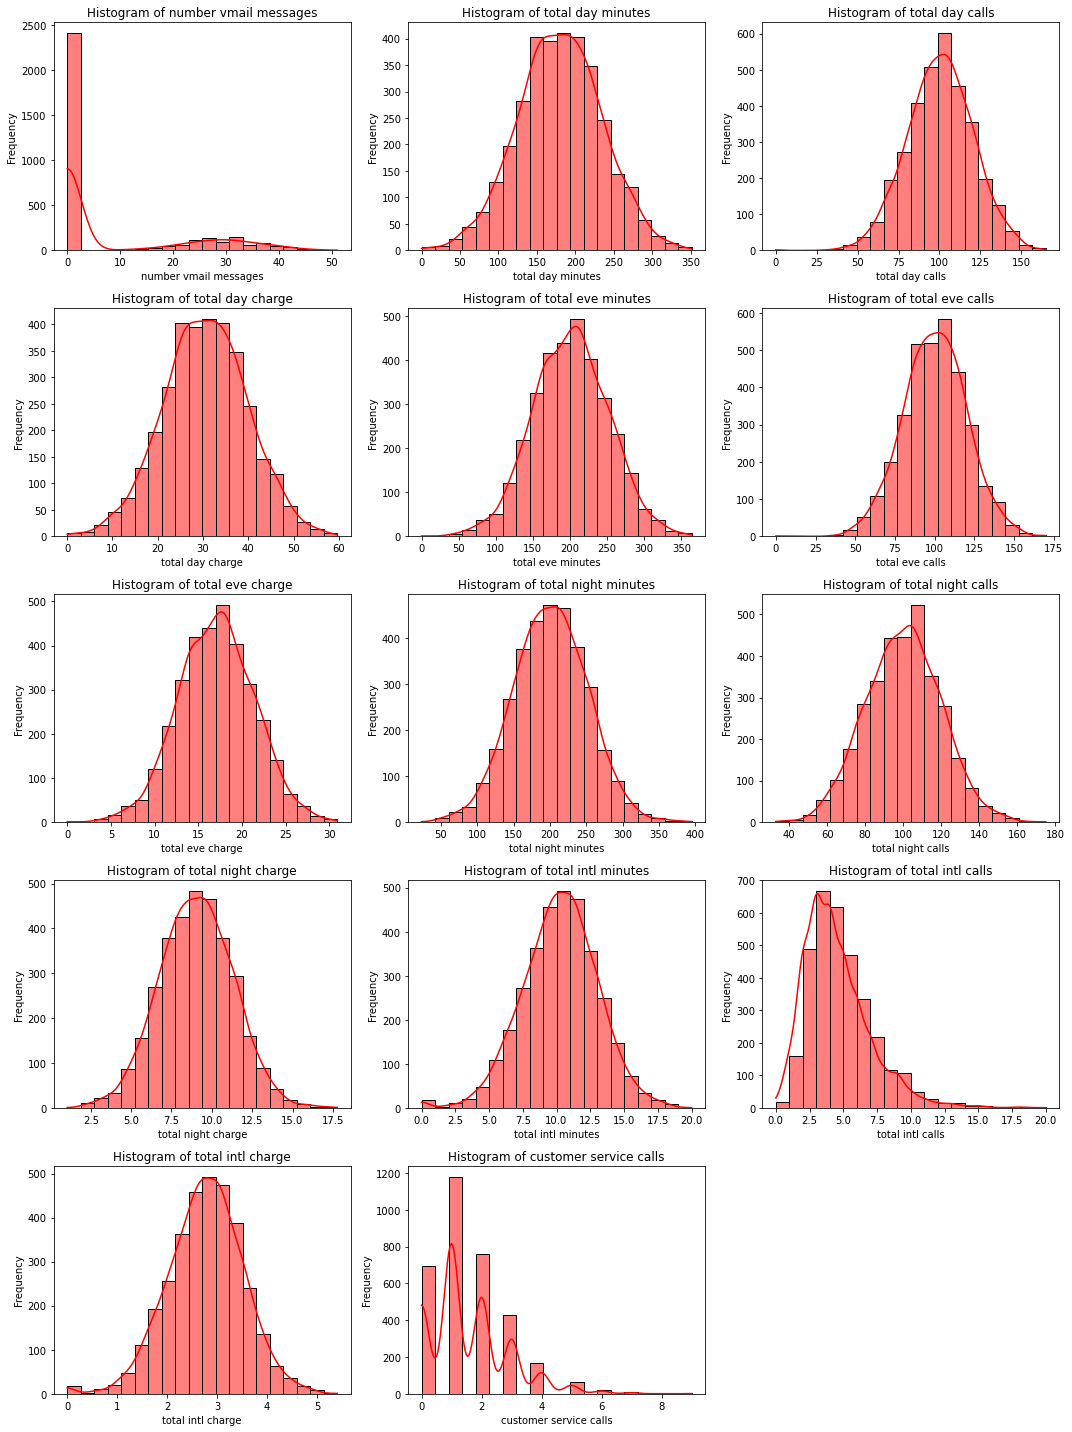

In [102]:
# Calculating the number of rows needed
subplots_per_row = 3
num_subplots = numeric_columns.shape[1]
num_rows = (num_subplots + subplots_per_row - 1) // subplots_per_row
# grid of subplots with determined rows and columns
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Step 4: Plot histograms with KDE
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(numeric_columns[column], bins=20, kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Histogram of {column}') 
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency')

# Step 5: Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> 1. KDE provides a smooth estimate of the distribution of each feature.
> 2. The KDE line almost perfectly matches the histogram in most of the columns indicating the data follows a normal
> distribution except for 'number_vmail_messages', 'total_intl_calls' and 'customer_service_calls'.
> 3. 'number_vmail_messages': It is right skewed with almost 0 customers sent over 2000 voicemails. 
> 4. 'total_intl_calls': Also right skewed with less that 5 customers making over 600 international calls.
> 5. 'customer_service_calls': There are close to 1200 clients making only 1 customer service call a day.

**BIVARIATE ANALYSIS**

> It invloves exploring relationships between two variables.

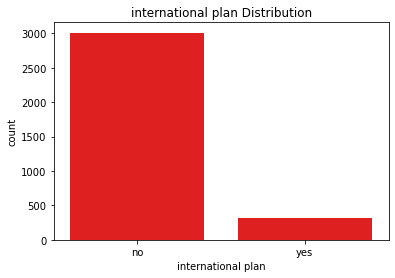

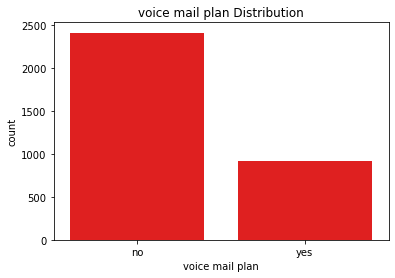

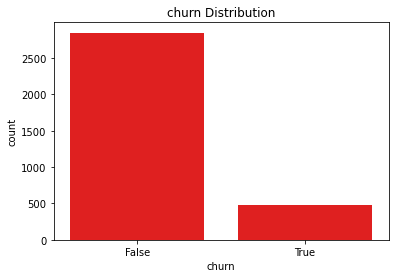

In [98]:
for column in categorical_columns:
    sns.countplot(x= column, data= data, color= 'red', order= data[column].value_counts().index)
    plt.title(f'{column} Distribution')
    plt.show()